# **Notebook NLP - 1 - Boeing Exploratory Data Analysis**

**Purpose: Exploring Boeing's textual data. Requires Vaex package. Independent from scripts in `sestm` and other notebooks.**

In [1]:
# Packages
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import vaex
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS as STOPWORDS

# NLP Packages
# import nltk
# from sklearn.feature_extraction.text import CountVectorizer

# Other
plt.style.use('fivethirtyeight')
SEED = 2077

# **1. Data**

In [2]:
!ls -l ../../data --block-size=GB

total 33GB
-rw-rw-r-- 1 ubuntu ubuntu 13GB Dec 11 08:39 boeing.json
-rw-rw-r-- 1 ubuntu ubuntu  9GB Dec 11 08:33 coca.json
-rw-rw-r-- 1 ubuntu ubuntu 11GB Dec 11 08:36 starbucks.json


In [3]:
def read_huge_json_to_dataframe(path):
    """ Utility to read NLP +10GB JSON files into DataFrames
    """
    # pandas.read_json crashes RAM
    with open(path) as f:
        data = pd.DataFrame(json.loads(line) for line in f)
    
    # Meta info (site, site_type, country) is a column
    # of dictionnaries
    meta = pd.DataFrame(list(data['thread']))
    data = pd.concat([data, meta], axis=1, ignore_index=False)
    del data['thread']
    
    # Some titles are under list form
    data['title'] = data['title'].apply(lambda x: '' if isinstance(x, list) else x)
    
    # Country has mixed types (str, float, list)
    data['country'] = data['country'].apply(lambda x: '' if isinstance(x, list) else x)
    data['country'] = data['country'].fillna('')
    
    return data

In [4]:
path = '../../data/boeing.json'
data = read_huge_json_to_dataframe(path)

In [5]:
# Convert Pandas DataFrame to Vaex DataFrame
vaex_df = vaex.from_pandas(data, copy_index=False)

In [6]:
# Combine Title and Text Body (this operation in Pandas leads to
# kernel shutdown)
vaex_df['text'] = vaex_df['title'] + ' ' + vaex_df['text']

In [7]:
# Lowercase
vaex_df['text'] = vaex_df['text'].str.lower()

# Remove Email and HTTP Addresses
# vaex_df['text_new'] = vaex_df['text_new'].str.replace(r'\S*@\S*\s?', '', regex=True)
# vaex_df['text_new'] = vaex_df['text_new'].str.replace(r'(http\S+|https\S+)', '', regex=True)
# vaex_df['text_new'] = vaex_df['text_new'].str.replace(r'(\s+)', ' ', regex=True)

In [8]:
vaex_df[['crawled', 'text']]

#,crawled,text
0,2015-01-01T05:24:57.000+02:00,""" ... and here's the release\nsas launches servic..."
1,2015-01-01T02:57:39.000+02:00,"'s&p 500 winners, losers: southwest on top faceb..."
2,2015-01-01T10:16:26.000+02:00,"'rare events rare events december 31st, 2014 - 1..."
3,2015-01-01T10:18:20.000+02:00,'southwest airlines rose most in s&p 500 in 2014...
4,2015-01-01T04:50:30.000+02:00,'offical car audio glossary of terms m - z m-\nma...
...,...,...
"2,783,775",2020-11-10T15:10:26.374Z,'stock topic 12 17 \nhere comes boeing\nhttps://im...
"2,783,776",2020-11-10T15:06:45.170Z,"""growing demand for uav's & drones surge for nat..."
"2,783,777",2020-11-10T16:17:01.424Z,"'jeppesen atpl book set \ngood day,\ni have a jepp..."
"2,783,778",2020-11-10T15:50:15.180Z,'did u.s. spy planes masquerading as airliners e...


In [9]:
!ls -l ../cppib_data/ --block-size=GB

total 24GB
-rw-rw-r-- 1 ubuntu ubuntu 13GB Dec 18 13:20 boeing-nlp-data-201501-202011.hdf5
-rw-rw-r-- 1 ubuntu ubuntu 11GB Dec 17 15:33 starbucks-nlp-data-201501-202011.hdf5
-rw-rw-r-- 1 ubuntu ubuntu  1GB Dec 16 13:56 surpriseSales.csv


In [10]:
new_path = '../cppib_data/boeing-nlp-data-201501-202011.hdf5'
vaex_df.export_hdf5(new_path)

# **2. Exploratory Data Analysis**

In [2]:
new_path = '../cppib_data/boeing-nlp-data-201501-202011.hdf5'
# data = pd.read_parquet(new_path, engine='pyarrow')
vaex_df = vaex.open(new_path)

In [3]:
print(vaex_df.shape)
vaex_df

(2783780, 11)


#,ord_in_thread,author,crawled,language,text,title,url,id,country,site,site_type
0,2,SiteAdministrator,2015-01-01T05:24:57.000+02:00,english,""" ... and here's the release\nsas launches servic...",,'http://www.businesstraveller.asia/discussion/to...,R_CYQGwBHLAW8ifQFKe-,GB,businesstraveller.asia,discussions
1,0,,2015-01-01T02:57:39.000+02:00,english,"'s&p 500 winners, losers: southwest on top faceb...","S&P 500 winners, losers: Southwest on top",'http://www.usatoday.com/story/money/markets/201...,aAr8P2wBHLAW8ifQ5blv,US,usatoday.com,news
2,0,Richard Fernandez,2015-01-01T10:16:26.000+02:00,english,"'rare events rare events december 31st, 2014 - 1...",Rare Events,'http://pjmedia.com/richardfernandez/2014/12/31/...,eqBBQWwBHLAW8ifQVJjf,IL,pjmedia.com,news
3,0,,2015-01-01T10:18:20.000+02:00,english,'southwest airlines rose most in s&p 500 in 2014...,'Southwest Airlines rose most in S&P 500 in 2014...,'http://www.thestate.com/2014/12/31/3901609/sout...,N5QZQGwBHLAW8ifQXIKY,,thestate.com,news
4,0,Fred 01 Hybrid,2015-01-01T04:50:30.000+02:00,english,'offical car audio glossary of terms m - z m-\nma...,Offical Car Audio Glossary of Terms M - Z,'http://www.passatworld.com/forums/mobile-electr...,aa-ZQWwBHLAW8ifQwIkg,US,passatworld.com,discussions
...,...,...,...,...,...,...,...,...,...,...,...
"2,783,775",8,greengravy294,2020-11-10T15:10:26.374Z,english,'stock topic 12 17 \nhere comes boeing\nhttps://im...,Stock Topic 12 17,'https://gamefaqs.gamespot.com/boards/8-gamefaqs...,'9fc187ee4111cccbc98f4b2dd07f8e7e82a78b9be77e6c0...,US,gamespot.com,discussions
"2,783,776",1,PR Newswire (engl.),2020-11-10T15:06:45.170Z,english,"""growing demand for uav's & drones surge for nat...","""Growing Demand for UAV's & Drones Surge for Nat...",'https://www.wallstreet-online.de/nachricht/1314...,'cbb51d90cb868c888dbf7c8d33b8c9db159183ec0fc7d67...,DE,wallstreet-online.de,news
"2,783,777",1,Werner.B,2020-11-10T16:17:01.424Z,english,"'jeppesen atpl book set \ngood day,\ni have a jepp...",Jeppesen ATPL Book set,'https://avcom.co.za/phpBB3/viewtopic.php?f=279&...,'0b53f4243528c78988b1923f754c4d424e50eb540886dd0...,ZA,avcom.co.za,discussions
"2,783,778",1,Peter Suciu,2020-11-10T15:50:15.180Z,english,'did u.s. spy planes masquerading as airliners e...,'Did U.S. Spy Planes Masquerading as Airliners E...,'https://nationalinterest.org/blog/reboot/did-us...,'590aa8f4e0c86edecdbf14fc29386ae3e641e459354d8bd...,US,nationalinterest.org,blogs


**Parse dates**

In [4]:
vaex_df['crawled'] = vaex_df['crawled'].astype('datetime64[ns]')
vaex_df['date'] = vaex_df['crawled'].astype('datetime64[D]')

**Document language**

In [5]:
vaex_df['language'].value_counts(dropna=False)

english    2783780
dtype: int64

**Time series**

In [6]:
# GroupBy
data_copy = vaex_df.copy()
data_copy['date'] = data_copy['date'].astype(str)
data_daily = data_copy.groupby(by='date', agg='count')

# Convert to Pandas Dataframe
data_daily_df = data_daily.to_pandas_df()
data_daily_df['date'] = pd.to_datetime(data_daily_df['date'])
data_daily_df = data_daily_df.set_index('date')
data_daily_df = data_daily_df.sort_index()

In [7]:
data_daily_df.groupby([pd.Grouper(freq='W-MON')])['count'].sum()

date
2015-01-05     3075
2015-01-12     7338
2015-01-19     6757
2015-01-26     6564
2015-02-02     9644
              ...  
2020-10-19     9006
2020-10-26     8852
2020-11-02    10840
2020-11-09     9019
2020-11-16     2040
Freq: W-MON, Name: count, Length: 307, dtype: int64

<AxesSubplot:xlabel='date'>

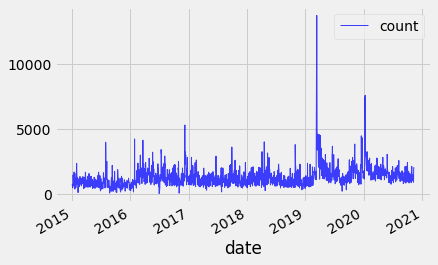

In [8]:
data_daily_df.plot(color='blue', lw=1, alpha=0.75, label='Daily count')

In [9]:
import datetime

INFO:MainThread:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:MainThread:numexpr.utils:NumExpr defaulting to 8 threads.
<ipython-input-10-0d43ff14d344>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


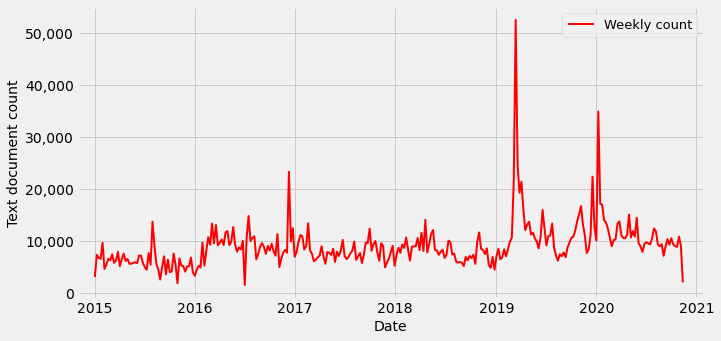

In [10]:
f, ax = plt.subplots(figsize=(10,5))
# data_daily_df.plot(color='blue', lw=1, alpha=0.75, ax=ax, label='Daily count')
data_daily_df.groupby([pd.Grouper(freq='W-MON')])['count'].sum() \
        .plot(color='red', lw=2, ax=ax, label='Weekly count')
ax.legend(['Weekly count'], loc='best', fontsize=13)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Text document count', fontsize=14)
# ax.set_title('Boeing News Count', fontsize=15)
ax.set_xlim([datetime.date(2014, 11, 1), datetime.date(2021, 2, 1)])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.savefig('../images/2_data/boeing_article_count.png', bbox_inches='tight')
plt.show()

**Metadata**

In [11]:
vaex_df['country'] = vaex_df['country'].apply(lambda x: 'Other' if x == '' else x)

<ipython-input-12-70cd0cfb2c2c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in ax[0].get_yticks().tolist()])
<ipython-input-12-70cd0cfb2c2c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1].get_yticks().tolist()])


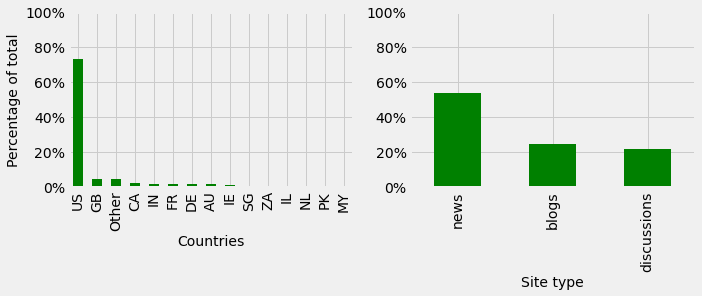

In [12]:
f, ax = plt.subplots(figsize=(10,3), ncols=2)
(vaex_df['country'].value_counts() / vaex_df['country'].value_counts().sum()).head(15).plot(kind='bar', color='green', ax=ax[0])
(vaex_df['site_type'].value_counts() / vaex_df['site_type'].value_counts().sum()).head(10).plot(kind='bar', color='green', ax=ax[1])
ax[0].set_xlabel('Countries', fontsize=14)
ax[0].set_ylabel('Percentage of total', fontsize=14)
ax[1].set_xlabel('Site type', fontsize=14)
ax[1].set_ylabel('')
f.suptitle('', fontsize=15)
ax[0].set_ylim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.0])
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in ax[0].get_yticks().tolist()])
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1].get_yticks().tolist()])
# f.tight_layout()
plt.savefig('../images/2_data/boeing_article_compo.png', bbox_inches='tight')
plt.show()

In [13]:
(vaex_df['site'].value_counts() / vaex_df['site'].value_counts().sum()).head(30)

blogspot.com            0.043414
reddit.com              0.041574
airliners.net           0.032574
yahoo.com               0.026384
flyertalk.com           0.017423
wordpress.com           0.011976
4channel.org            0.006201
4-traders.com           0.005938
reuters.com             0.005912
morningstar.com         0.005526
financialcontent.com    0.005067
seattletimes.com        0.004899
pprune.org              0.004887
businessinsider.com     0.004867
flickr.com              0.004442
youtube.com             0.004178
ycombinator.com         0.003958
msn.com                 0.003760
wn.com                  0.003601
fark.com                0.003599
nasdaq.com              0.003579
marketscreener.com      0.003572
nasaspaceflight.com     0.003529
4chan.org               0.003464
foxnews.com             0.003420
defence.pk              0.003389
flightglobal.com        0.003202
seekingalpha.com        0.003143
marketwatch.com         0.003066
my.jobs                 0.002999
dtype: flo

**Wordcount**

In [38]:
word_count_vx = vaex_df['text'].apply(lambda x: len(x.split(' ')))
word_count_vx

Expression = lambda_function_3(text)
Length: 2,783,780 dtype: int64 (expression)
-------------------------------------------
      0   491
      1   218
      2  1535
      3   348
      4  4252
     ...     
2783775     7
2783776   429
2783777    30
2783778   722
2783779  1098

In [39]:
word_count_df = word_count_vx.to_pandas_series()

In [40]:
word_count_df.describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95, 0.999]).astype(int)

count    2783780
mean         659
std         1630
min            2
10%           49
25%          144
50%          396
75%          746
90%         1242
95%         1845
99.9%      16612
max       360599
dtype: int64

<ipython-input-42-2d0c03852513>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()])
<ipython-input-42-2d0c03852513>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
<ipython-input-42-2d0c03852513>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,}'.format(int(x)) for x in ax2.get_xticks().tolist()])
<ipython-input-42-2d0c03852513>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


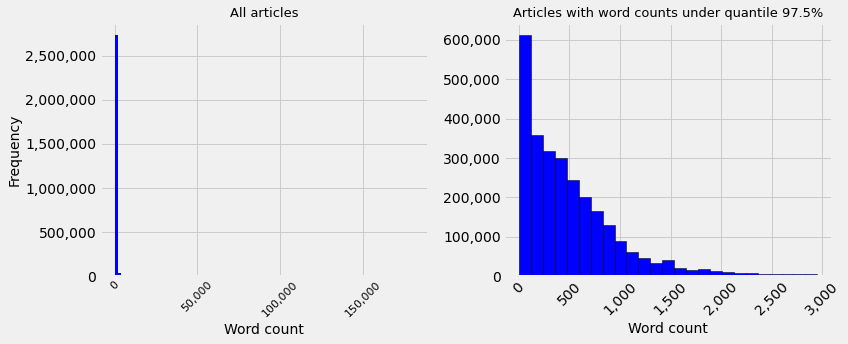

In [42]:
f, (ax1, ax2) = plt.subplots(figsize=(12,5), ncols=2)

word_count_df.plot(kind='hist', ax=ax1, bins=100, color='blue')
ax1.set_xlabel(xlabel='Word count', fontsize=14)
ax1.set_ylabel(ylabel='Frequency', fontsize=14)
ax1.set_title('All articles', fontsize=13)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, fontsize=11)

word_count_df[word_count_df.quantile(0.975) > word_count_df].plot(kind='hist', color='blue',
                                                                 ax=ax2,
                                                                 bins=25, edgecolor='black')
ax2.set_xlabel(xlabel='Word count', fontsize=14)
ax2.set_ylabel(ylabel='', fontsize=14)
ax2.set_title('Articles with word counts under quantile 97.5%', fontsize=13)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()])
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax2.set_xticklabels(['{:,}'.format(int(x)) for x in ax2.get_xticks().tolist()])
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

f.tight_layout()
f.suptitle('', fontsize=15)
plt.savefig('../images/2_data/boeing_word_count.png', bbox_inches='tight')
plt.show()